In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import os
import sys

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
LIBRARY_DIR = os.path.join(CURRENT_DIR, '..', '..')

sys.path.append(LIBRARY_DIR)

In [3]:
import os

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))

def saveas(name):
    image_name = '{}.png'.format(name)
    image_path = os.path.join(LIBRARY_DIR, 'site', '2017', '12', '10', 'images', image_name)
    plt.savefig(image_path, facecolor='#f8fafb', bbox_inches='tight')

In [4]:
from itertools import product

import numpy as np

from neupy.algorithms.competitive.neighbours import find_neighbours_on_rect_grid
from examples.competitive.utils import plot_2d_grid

red, blue, black, gray = ('#E24A33', '#348ABD', '#000000', '#AAAAAA')

In [5]:
import math
from neupy import algorithms

def plot_grid(current_grid, data=None, color=blue):
    plot_2d_grid(
        np.transpose(current_grid.reshape((9, 9, 2)), (2, 0, 1)),
        color=color)

    plt.scatter(*current_grid.T, color=color, s=50, zorder=100)
    
    if data is not None:
        plt.scatter(*data.T, color=black, s=100)

        plt.xlim(-9, 17)
        plt.ylim(-9, 17)

    plt.xticks([])
    plt.yticks([])
    
def make_grid():
    return np.array(list(product(range(9), range(9))))

def make_sofm(step=0.4, radius=2, std=1):
    current_grid = make_grid()
    return algorithms.SOFM(
        n_inputs=2,
        step=step,
        features_grid=(9, 9),
        learning_radius=radius,
        std=std,
        weight=current_grid.T)

In [6]:
def sofm_diagrams_two_rotating_dots(step=0.4, radius=2, std=1, rotation_angle=360, color=blue, show_dots=False):
    data = np.array([[15, 4, -7, 4], [4, 15, 4, -7]]).T
    data = data[[0, 2], :]
    sofm = make_sofm(step, radius, std)
    
    iterations = 360 // rotation_angle

    for i in range(iterations):
        phi = math.radians(rotation_angle)
        rotation = np.array([
            [math.cos(phi), -math.sin(phi)],
            [math.sin(phi), math.cos(phi)],
        ])
        data = (data - 4).dot(rotation) + 4
        sofm.train(data, epochs=1)
        
        if show_dots:
            plt.scatter(*data.T, color=gray, s=100)

    plot_grid(
        current_grid=sofm.weight.T,
        data=data if show_dots else None,
        color=color)

def sofm_diagrams_four_fixed_dots(step=0.4, radius=2, std=1, color=blue, show_dots=False):
    data = np.array([[15, 4, -7, 4], [4, 15, 4, -7]]).T

    sofm = make_sofm(step, radius, std)
    sofm.train(data, epochs=1)

    plot_grid(
        current_grid=sofm.weight.T,
        data=data if show_dots else None,
        color=color)

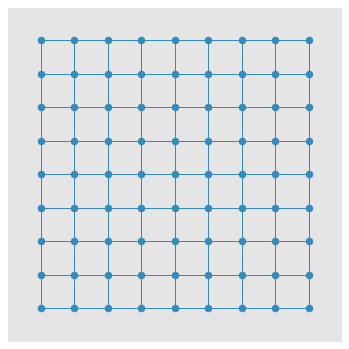

In [58]:
plt.figure(figsize=(6, 6))
plot_grid(current_grid=make_grid(), color=blue)
saveas('sofm-grid')

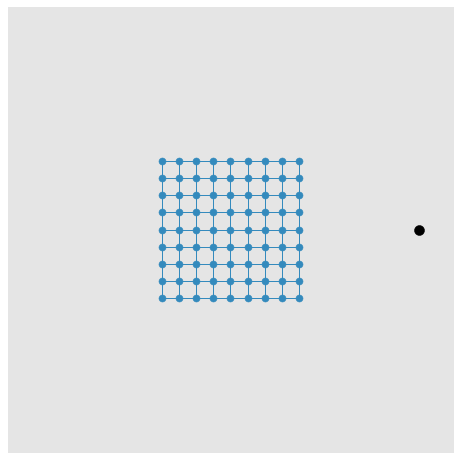

In [71]:
plt.figure(figsize=(8, 8))
data = np.array([[15], [4]]).T

sofm = make_sofm(step=0.25, radius=2, std=1)

plot_grid(current_grid=sofm.weight.T, color=blue, data=data)
saveas('sofm-before-update-with-one-data-point')

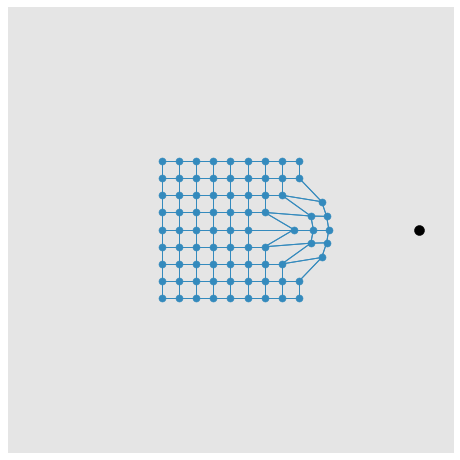

In [74]:
plt.figure(figsize=(8, 8))
data = np.array([[15], [4]]).T

sofm = make_sofm(step=0.25, radius=2, std=1)
sofm.train(data, epochs=1)

plot_grid(current_grid=sofm.weight.T, color=blue, data=data)
saveas('sofm-update-with-one-data-point')

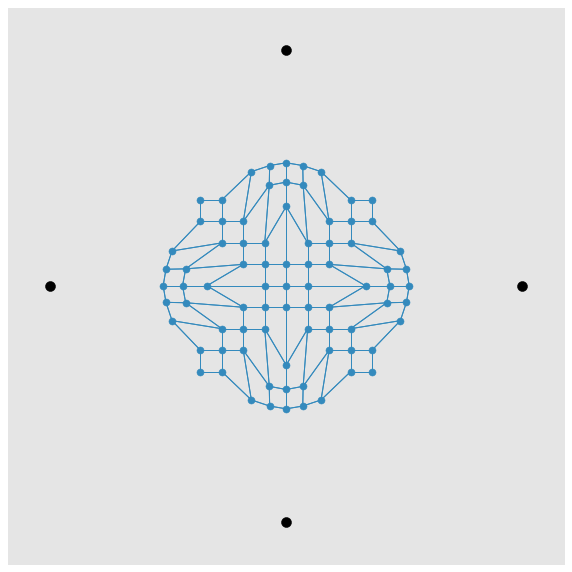

In [73]:
plt.figure(figsize=(10, 10))
sofm_diagrams_four_fixed_dots(
    # The larger the value the closer points will be
    # pulled to the black dots
    step=0.25,

    # The bigger the radius the more dots will
    # be pulled closer to the black dots
    radius=2,

    # The larger the value the "force" will be applied to
    # the neighbour during the pulling
    std=1,

    # Show black dots that we use for SOFM training on the plot
    show_dots=True,
)
saveas('sofm-4-dots-update')

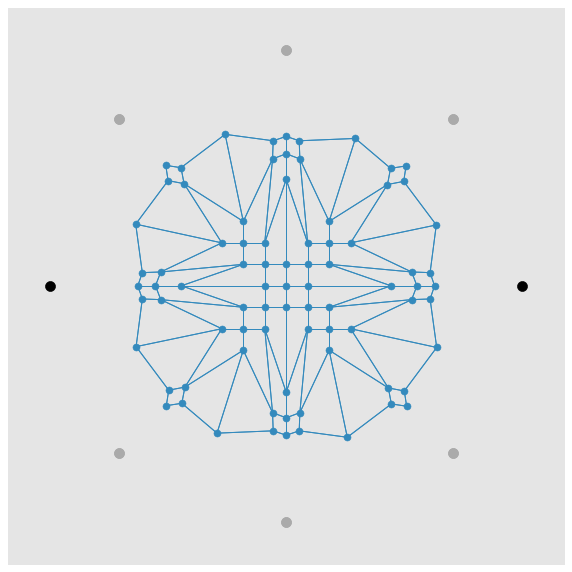

In [30]:
plt.figure(figsize=(10, 10))
sofm_diagrams_two_rotating_dots(
    step=0.25,
    radius=2,
    std=1,
    show_dots=True,
    # There are two dots that we use as training sample for sofms
    # Rotation angle defines by how much we will rotate data points
    # before training another epoch
    rotation_angle=45,
)
saveas('sofm-update-and-rotate')

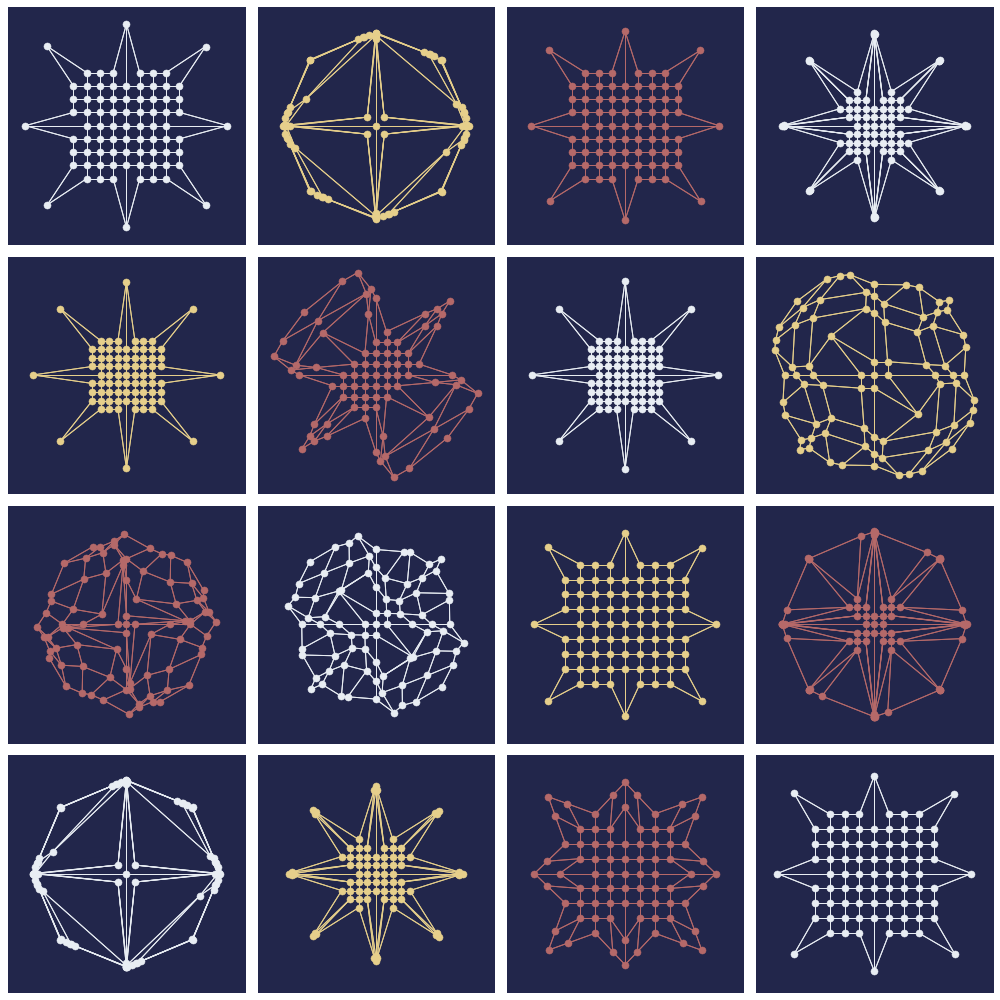

In [79]:
fig = plt.figure(figsize=(14, 14))

np.random.seed(33)
use_dark_background = True

if use_dark_background:
    bgcolor = '#22264b'
    colors = ['#b56969', '#e8edf3', '#e6cf8b']
    
else:
    bgcolor = '#e8edf3'
    colors = ['#b56969', '#22264b', '#e6cf8b']

for index in range(1, 17):
    plt.subplot(4, 4, index)
    plt.gca().patch.set_facecolor(bgcolor)
    
    step = np.random.uniform(0.1, 1)
    radius = np.random.randint(0, 4)
    std = np.random.uniform(0.1, 2)
    color = colors[index % 3]
    
    sofm_diagrams_two_rotating_dots(step, radius, std, rotation_angle=45, color=color, show_dots=False)
    
    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    dist = min(4 - xmin, 4 - ymin, xmax - 4, ymax - 4)

    plt.xlim(4 - dist, 4 + dist)
    plt.ylim(4 - dist, 4 + dist)
    
plt.tight_layout()
saveas('sofm-16-generated-patterns')

In [108]:
def plot_pattern(step, radius, std, color):
    fig = plt.figure(figsize=(7, 7))
    plt.gca().patch.set_facecolor(bgcolor)

    sofm_diagrams_two_rotating_dots(step, radius, std, rotation_angle=45, color=color, show_dots=False)

    ax = plt.gca()
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    dist = min(4 - xmin, 4 - ymin, xmax - 4, ymax - 4)

    plt.xlim(4 - dist, 4 + dist)
    plt.ylim(4 - dist, 4 + dist)

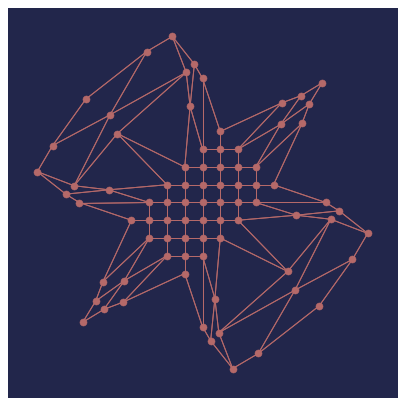

In [109]:
plot_pattern(step=0.5, radius=2, std=0.4, color=colors[0])
saveas('sofm-bird-pattern')

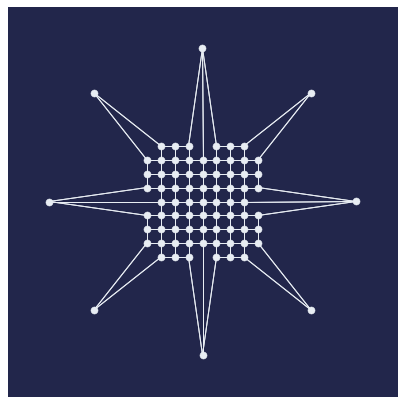

In [110]:
plot_pattern(step=1, radius=0, std=0.4, color=colors[1])
saveas('sofm-star-pattern')

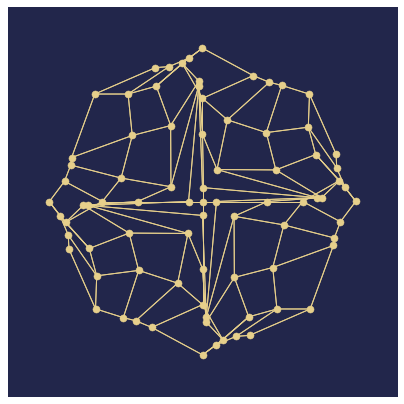

In [111]:
plot_pattern(step=1, radius=3, std=0.4, color=colors[2])
saveas('sofm-blob-pattern')

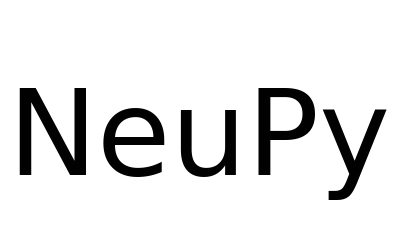

In [288]:
ax = plt.gca()
ax.patch.set_facecolor('#ffffff')
ax.text(0, 0.25, 'NeuPy', fontsize=120)

plt.xticks([])
plt.yticks([])

plt.savefig('neupy-text.png', facecolor='#ffffff', bbox_inches='tight')

/Users/itdxer/.pyenv/versions/3.6.0/envs/neupy36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


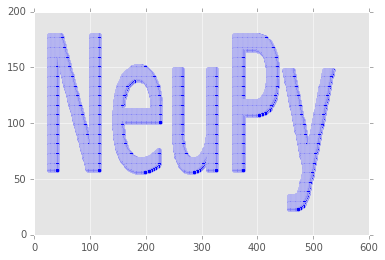

In [290]:
from scipy.misc import imread
neupy_text = imread('neupy-text.png') 
# Encode black pixels as 1 and white pixels as 0
neupy_text = (1 - neupy_text / 255.).round().max(axis=2)

data = []
for (x, y), value in np.ndenumerate(neupy_text):
    if value == 1:
        data.append([y, -x + 300])
        
data = np.array(data)
plt.scatter(*data.T)

1


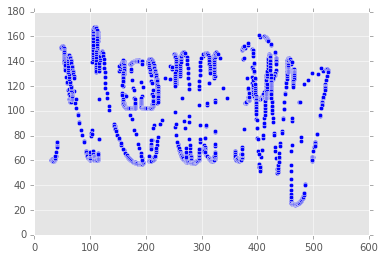

2


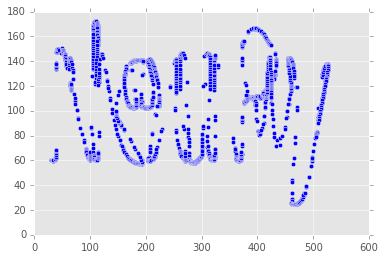

3


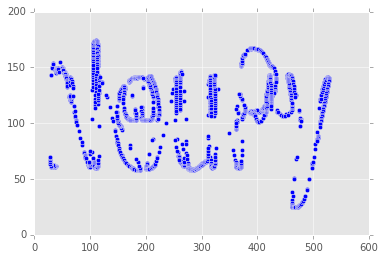

4


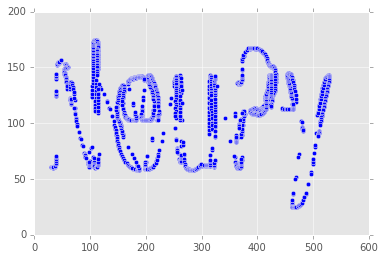

5


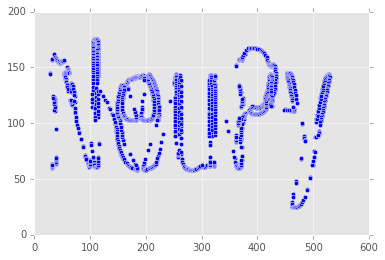

6


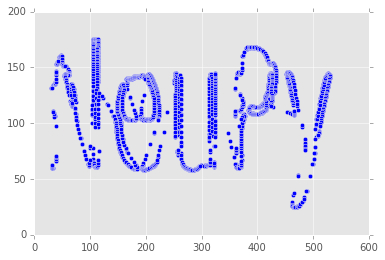

7


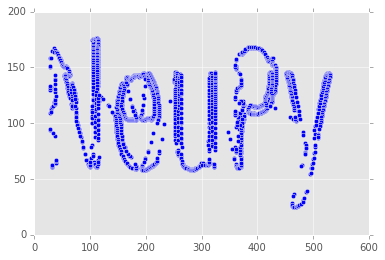

8


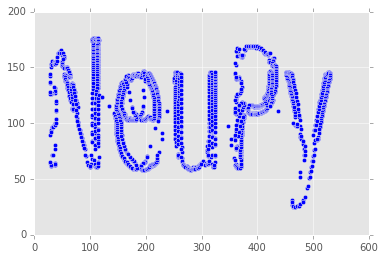

9


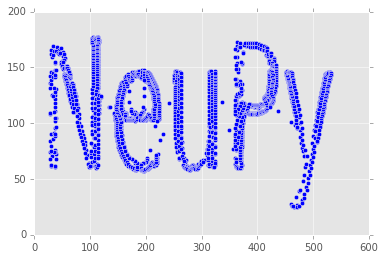

10


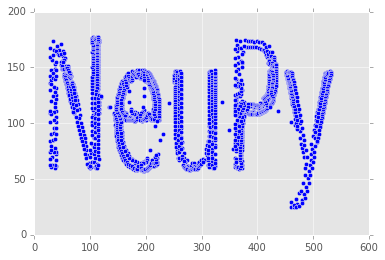

11


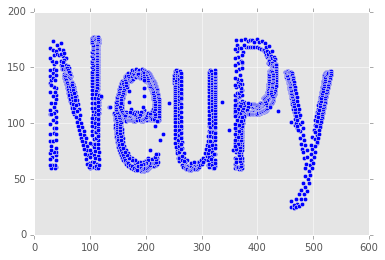

12


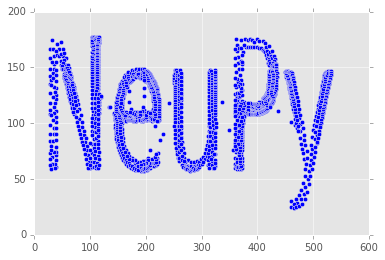

13


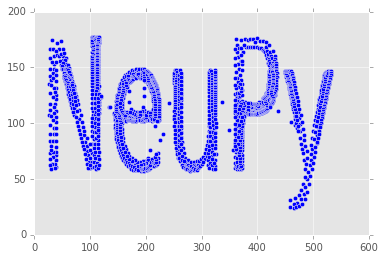

14


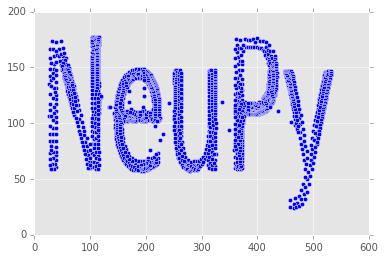

15


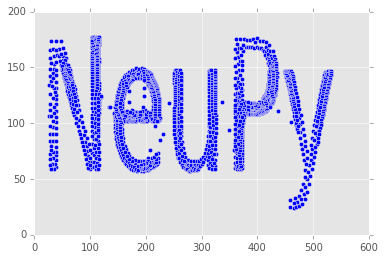

16


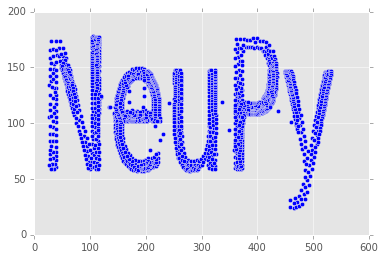

17


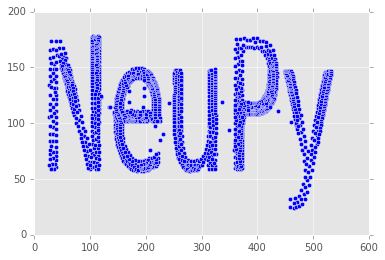

18


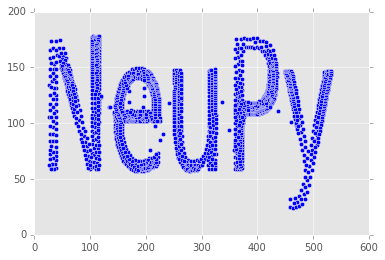

19


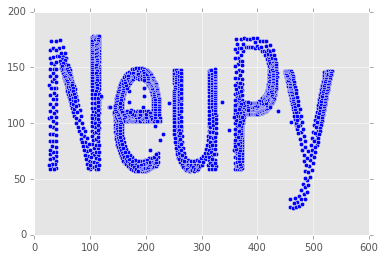

20


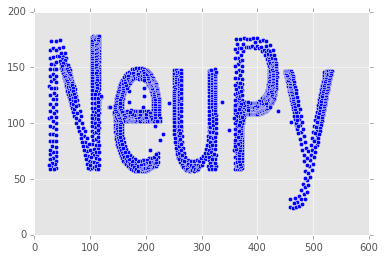

21


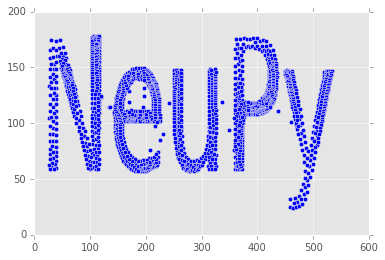

22


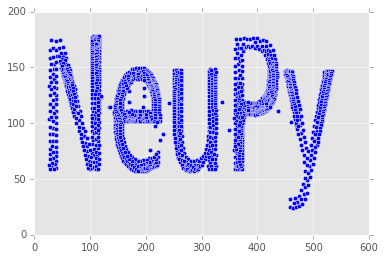

23


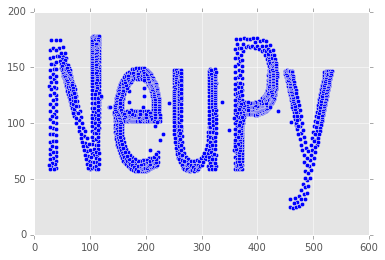

24


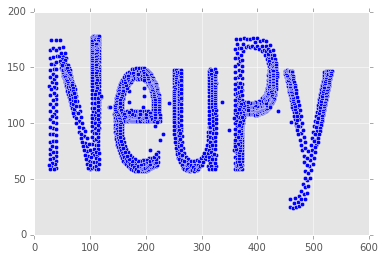

25


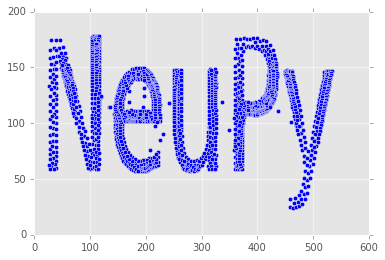

26


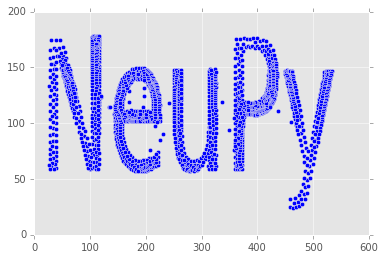

27


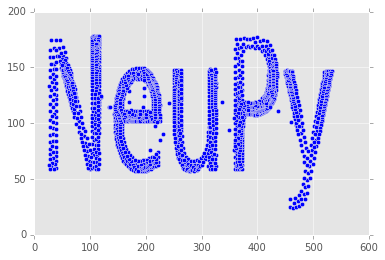

28


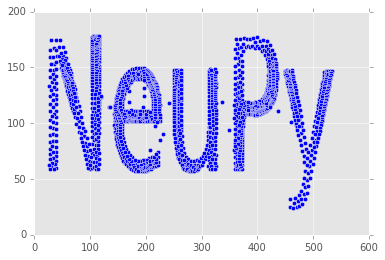

29


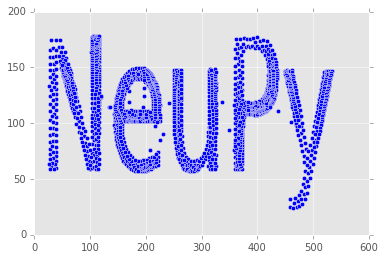

30


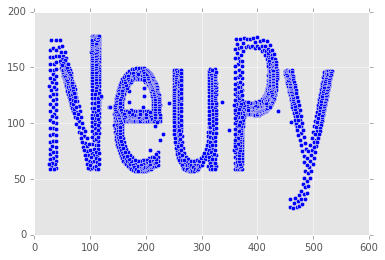

In [390]:
from neupy import init

n = 1000
weight = np.zeros((2, n))
weight[0, :] = np.linspace(25, 500, n)
weight[1, :] = (np.sin(np.linspace(0, 100, n)) + 1) * 50 + 50
weight = np.concatenate([weight, weight], axis=1)

sofm = algorithms.SOFM(
    n_inputs=2,
    step=0.05,
    features_grid=(2, n),
    learning_radius=10,
    verbose=False,
    weight=weight,
    reduce_radius_after=1,
    reduce_step_after=10)

for i in range(30):
    print(i + 1)
    sofm.train(data, epochs=1)
    plt.scatter(*sofm.weight)
    plt.show()

In [399]:
from itertools import product
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt


def iter_neighbours(weights, hexagon=False):
    _, grid_height, grid_width = weights.shape

    hexagon_even_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (1, 1), (-1, 1))
    hexagon_odd_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (-1, -1), (1, -1))
    rectangle_actions = ((-1, 0), (0, -1), (1, 0), (0, 1))

    for neuron_x, neuron_y in tqdm(product(range(grid_height), range(grid_width))):
        neighbours = []

        if hexagon and neuron_x % 2 == 1:
            actions = hexagon_even_actions
        elif hexagon:
            actions = hexagon_odd_actions
        else:
            actions = rectangle_actions

        for shift_x, shift_y in actions:
            neigbour_x = neuron_x + shift_x
            neigbour_y = neuron_y + shift_y

            if 0 <= neigbour_x < grid_height and 0 <= neigbour_y < grid_width:
                neighbours.append((neigbour_x, neigbour_y))

        yield (neuron_x, neuron_y), neighbours


def plot_2d_grid(weights, ax=None, color='green', hexagon=False):
    if weights.ndim != 3:
        raise ValueError("Number of dimensions should be equal to 3 "
                         "(shape: (2, height, width)), got {} instead"
                         "".format(weights.ndim))

    n_features = weights.shape[0]

    if n_features != 2:
        raise ValueError("First dimension should be equal to 2")

    if ax is None:
        ax = plt.gca()

    for (neuron_x, neuron_y), neighbours in iter_neighbours(weights, hexagon):
        for (neigbour_x, neigbour_y) in neighbours:
            neurons_x_coords = (neuron_x, neigbour_x)
            neurons_y_coords = (neuron_y, neigbour_y)

            neurons = weights[:, neurons_x_coords, neurons_y_coords]
            color = colors[np.random.randint(0, len(colors))]
#             color = '#F8FAFB'
            ax.plot(*neurons, color=color, linewidth=1)
#             plt.scatter(*neurons_x_coords, color=color)

#     plt.scatter(*weights, color=color, s=50)

2000it [00:08, 244.20it/s]


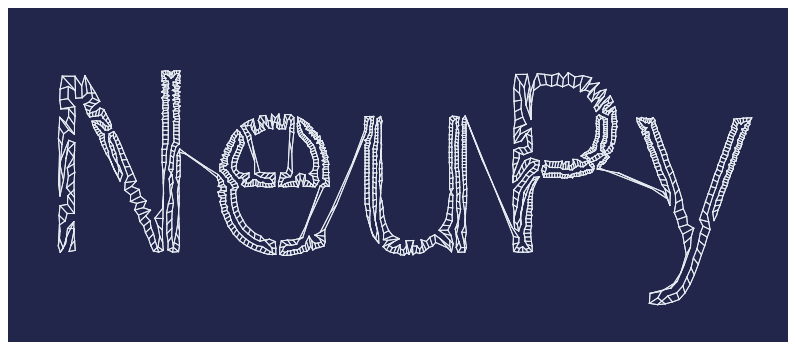

In [400]:
bgcolor = '#22264b'
colors = ['#b56969', '#e8edf3', '#e6cf8b']
colors = ['#e8edf3']

# bgcolor = '#F2E9E9'
# colors = ['#EFCACA', '#E1A2A2', '#DA7C7C', '#D56060']

# bgcolor = '#A2E09D'
# colors = ['#239756', '#48B389', '#7AC173', '#135F1E']

# bgcolor = '#303841'
# colors = ['#D14B5D']

fig = plt.figure(figsize=(14, 6))
plt.gca().patch.set_facecolor(bgcolor)
plot_2d_grid(np.transpose(sofm.weight.T.reshape((2, n, 2)), (2, 0, 1)))
# colors = ['#303841']
# plot_2d_grid(np.transpose(outer_sofm.weight.T.reshape((30, 30, 2)), (2, 0, 1)))

plt.xticks([])
plt.yticks([])

plt.ylim(0, 220)
plt.xlim(-10, 560);